In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to build the models
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
X_train = pd.read_csv('/Users/patrycjapiechowicz/CYBER/xtrain.csv')
X_test = pd.read_csv('/Users/patrycjapiechowicz/CYBER/xtest.csv')

In [3]:
y_train=X_train.iloc[:,0]
y_test=X_test.iloc[:,0]
X_train=X_train.iloc[:,1:]
X_test=X_test.iloc[:,1:]

In [4]:
X_train

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
0,0.0,0.105263,0.000000,0.000000,0.326206,0.333333,0.0,0.0,0.0,0.0,0.363014,1.0,1.0,1.0,0.000000,0.000000,0.188235,0.000000,0.4,0.000000,0.6,0.0,0.004454,0.000000,0.003344,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000142,0.000092,0.000260,0.002149,0.000430,0.001401,0.000444,0.000371,0.002526,0.001222,0.002317,0.001034,0.000464,0.002580,0.002753,0.000067,0.000545,0.000684,0.000534,0.001038,0.001100,0.000825,0.000891,0.000987,0.000904,0.000979,0.000295,0.000463,0.000574,0.002382,0.000357,0.000429,0.000107,0.000476,0.001102,0.000590,0.001013,0.000553,0.000202,0.000925,0.000510,0.000558,0.001320,0.002462,0.000759,0.001425,0.001045,0.000554,0.000209,0.001044,0.001200,0.000622,0.000316,0.000309,0.000507,0.000587,0.001665,0.000878,0.000703,0.000328,0.002594,0.000164,0.001758,0.000573,0.000059,0.000810,0.001023,0.000440,0.000777,0.001208,0.001160,0.001856,0.001119,0.000989,0.000845,0.001108,0.001004,0.001411,0.000938,0.001277,0.000732,0.000221,0.001139,0.001033,0.001120,0.002203,0.000669,0.000893,0.001223,0.001053,0.000876,0.000026,0.000953,0.001292,0.000140,0.000097,0.002667,0.001216,0.913392,0.000000,0.016662,0.001305,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000005,0.000655,0.000703,0.000670,0.0,0.0,0.000010,0.001290,0.25,0.004556,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000052,0.000000,0.000000,0.001932,0.000821,0.033743,0.0
1,0.0,0.105263,0.222222,0.666667,0.877500,0.000000,1.0,1.0,1.0,1.0,0.308515,1.0,1.0,1.0,0.000000,0.000000,0.023529,0.000000,0.4,0.000000,0.4,0.0,0.001821,0.098592,0.003344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000047,0.000119,0.000116,0.003610,0.000407,0.000885,0.000232,0.000241,0.001385,0.001385,0.001567,0.000814,0.000414,0.001918,0.000684,0.000058,0.000174,0.000386,0.000668,0.000969,0.000650,0.000598,0.000800,0.000837,0.000377,0.000690,0.000319,0.000373,0.000408,0.001276,0.000472,0.000273,0.000104,0.000225,0.000657,0.000501,0.000376,0.000398,0.000257,0.000988,0.001371,0.000406,0.001650,0.002928,0.000664,0.000666,0.000906,0.000501,0.000221,0.000969,0.000642,0.000410,0.000223,0.000285,0.000295,0.000926,0.002200,0.001061,0.000615,0.000340,0.002269,0.000410,0.002901,0.000675,0.000053,0.000267,0.000352,0.000148,0.000443,0.000283,0.000520,0.000717,0.000597,0.000184,0.001448,0.001216,0.000458,0.000290,0.000243,0.000288,0.000504,0.000158,0.000235,0.000181,0.000230,0.000652,0.000563,0.000610,0.000944,0.000476,0.000692,0.000060,0.001543,0.001216,0.000492,0.000175,0.002671,0.000651,0.987592,0.001676,0.004416,0.000504,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000006,0.000263,0.000002,0.000498,0.0,0.0,0.000000,0.000000,0.25,0.000060,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000026,0.000000,0.000000,0.000000,0.004024,0.001151,0.0
2,1.0,0.263158,0.333333,0.500000,0.884415,0.833333,1.0,1.0,1.0,1.0,0.354475,1.0,1.0,1.0,0.001224,0.000035,0.023529,0.000000,0.4,0.000000,0.4,0.0,0.002675,0.098592,0.003344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000475,0.000815,0.000776,0.016933,0.003568,0.010467,0.002725,0.002660,0.011736,0.009126,0.013287,0.004356,0.003240,0.016072,0.004859,0.000400,0.002300,0.003397,0.003815,0.003968,0.005624,0.003169,0.004092,0.004099,0.004424,0.004294,0.002690,0.002597,0.003380,0.008761,0.002819,0.002055,0.001228,0.001583,0.005042,0.002055,0.003604,0.002609,0.001237,0.004014,0.010393,0.002698,0.012321,0.0137

In [5]:
X_train.shape,y_train.shape,X_test.shape, y_test.shape

((5400, 178), (5400,), (600, 178), (600,))

#### PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=50)

In [8]:
pca.fit(X_train)

PCA(n_components=50)

In [9]:
x_pca = pca.transform(X_train)

In [10]:
X_train.shape

(5400, 178)

In [11]:
x_pca.shape

(5400, 50)

In [12]:
x_pca_test = pca.transform(X_test)

In [13]:
x_pca_test.shape

(600, 50)

#### Interpreting the components
Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [65]:
pca.components_

array([[-0.18869202, -0.0098586 , -0.01932591, ..., -0.00338662,
         0.00218988,  0.11536033],
       [ 0.24556833,  0.02108173, -0.03276335, ..., -0.01060171,
        -0.00087016, -0.44032853],
       [-0.33592826,  0.05774096,  0.01956947, ..., -0.00502188,
         0.00935783,  0.50198252],
       ...,
       [-0.01811174,  0.0027157 ,  0.00068038, ..., -0.01384214,
         0.1360674 , -0.00310671],
       [-0.0072079 ,  0.01403889, -0.06852603, ...,  0.1268182 ,
        -0.15261613,  0.00260668],
       [-0.0190111 ,  0.06068329, -0.1686994 , ..., -0.09527401,
        -0.02384293,  0.00449194]])

In [66]:
df_comp = pd.DataFrame(pca.components_,columns=X_train.columns)

In [67]:
df_comp

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
0,-0.188692,-0.009859,-0.019326,-0.034846,-0.030055,-0.062917,-0.102068,-0.296265,-0.365241,-0.364070,0.023305,-0.024326,-0.057028,-0.046327,-0.000283,-0.000076,0.021196,-0.007989,0.043346,0.001653,0.045737,0.002300,0.001043,-0.019784,0.000723,-0.061514,-0.060987,0.263931,0.338544,0.353197,0.124352,0.148295,0.126545,-0.022807,0.084539,0.030542,-0.000560,-0.000276,0.000262,0.000104,0.002213,0.001481,0.000492,0.000479,0.000104,0.001001,-0.000131,0.000064,-0.003352,0.000333,-0.001487,-0.000187,-0.000173,-0.001029,-0.001309,-0.002742,-0.000504,0.000145,-0.003052,0.001506,-0.000093,0.000955,0.000555,0.000293,0.000759,0.000110,0.000404,-0.000113,0.000043,-0.000095,0.000569,0.000434,0.000239,0.000771,0.000740,0.000712,0.000402,0.000535,0.001221,0.000441,0.000712,-0.000116,0.000683,0.000082,0.000098,0.001380,0.000181,-0.001419,-0.001127,0.000678,0.000363,-0.000121,0.000338,0.000649,-0.000203,0.000483,0.000519,0.000230,8.482175e-05,0.000998,0.000692,-0.000684,-0.001044,-0.000352,-0.000063,0.000062,0.000098,-0.000941,0.001687,-0.000086,0.001826,0.000623,0.000906,0.001786,0.001785,0.000923,0.001976,0.000527,0.001548,-0.000706,0.000184,0.001415,0.000991,0.001604,0.002013,0.000967,0.000201,0.001612,0.001225,0.001817,0.002581,0.000391,0.000099,-0.000044,0.000596,-0.000262,-0.000067,-0.001495,-0.001648,-0.000849,-0.000201,-0.001340,0.001244,-0.027602,-0.001396,-0.000018,-0.000376,0.268700,0.292095,0.053486,0.118477,0.019175,0.000085,0.001772,-0.000207,-0.000056,0.000169,-0.000081,0.000424,-0.000096,0.002041,0.000783,0.120107,0.002549,-0.000255,0.0,0.000027,-0.000759,-0.001295,0.006690,-0.014763,0.000479,0.000505,0.001468,0.000895,-0.003387,0.002190,0.115360
1,0.245568,0.021082,-0.032763,-0.098200,-0.042799,0.200886,-0.100772,-0.438427,0.154810,0.152517,-0.016688,-0.027971,-0.084156,-0.053776,0.000401,0.000384,0.004575,0.020644,-0.035443,-0.002862,-0.012602,-0.000452,0.002117,-0.005829,0.000038,0.179694,0.177312,-0.272843,0.105555,-0.009536,0.085293,0.120317,0.309278,0.017994,0.066786,0.014482,-0.005762,-0.003917,-0.002993,-0.001748,0.001755,0.001895,0.000009,-0.000352,0.000241,-0.000111,-0.001148,-0.000156,-0.012617,-0.001249,-0.006525,-0.001528,-0.001386,-0.004902,-0.005654,-0.009800,-0.003910,-0.001051,-0.005824,-0.001234,-0.000499,0.001271,-0.000395,0.001826,0.000499,0.001091,-0.000807,0.001602,-0.000720,0.000715,-0.000797,-0.002099,-0.001303,-0.001589,-0.004603,-0.001379,-0.002274,-0.000244,0.000187,-0.000156,0.001150,-0.000941,0.001259,-0.000762,-0.001896,0.000247,0.000962,-0.004611,-0.004857,0.000201,-0.000161,-0.001053,0.000290,0.000490,-0.003452,-0.000778,0.001048,0.000930,-3.894350e-07,-0.000802,-0.001420,-0.006743,-0.003109,-0.001868,-0.000880,-0.006000,-0.000807,-0.006015,0.001909,-0.000653,0.001599,0.000069,0.000284,0.001585,0.001953,-0.001018,0.000638,0.000535,0.001524,-0.004075,-0.001185,0.001491,0.000918,0.002020,0.001762,0.001073,-0.000186,0.001659,0.000951,0.001824,0.000924,-0.000302,-0.001777,0.000011,0.000099,-0.002300,-0.001293,-0.005918,-0.005422,-0.002393,-0.000679,-0.006181,-0.000149,-0.034450,-0.005044,-0.011132,-0.000386,-0.064840,0.317668,-0.193558,-0.046201,0.051452,-0.000201,0.005740,0.000141,0.000688,-0.000417,0.000018,0.000203,-0.002012,0.007441,0.000482,-0.022054,0.000027,0.000269,-0.0,0.000279,0.086081,0.006633,-0.004485,-0.017938,-0.000931,0.003368,0.000564,0.001512,-0.010602,-0.000870,-0.440329
2,-0.335928,0.057741

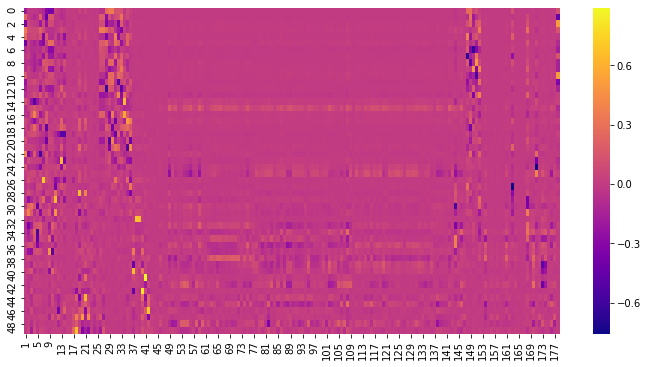

In [68]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [69]:
# create a function to build logistic regression and compare performance in train and test set

def run_logistic(X_train, X_test, y_train, y_test):
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44)
    logit.fit(X_train, y_train)
    print('Train set')
    pred = logit.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = logit.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [70]:
run_logistic(x_pca,
             x_pca_test,
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9037158853150675
Test set
Logistic Regression roc-auc: 0.9006810758992765


In [71]:
# create a function to build random forests and compare performance in train and test set

def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [72]:
run_randomForests(x_pca,
             x_pca_test,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9540935015493144
Test set
Random Forests roc-auc: 0.9399181817168464
